### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Third-Phase-Evaluation-Projects--1-\Census Income\Census Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

##### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Target 
- Income

#### Analising basic metrics

In [4]:
df.shape

(32560, 15)

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### Findings

- There are No Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

##### Findings
- There are 9 Object Type columns and 6 Numerical columns
- There are 9 Categorical columns(nunique <=16) and 6 continous columns


In [8]:
for i in df.columns:
    print (df[i].unique(),end='\n\n\n')

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


[ 83311 215646 234721 ...  34066  84661 257302]


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-

In [9]:
se=pd.Series(data=df.Education.unique(),index=df.Education_num.unique())
se.sort_index()

1         Preschool
2           1st-4th
3           5th-6th
4           7th-8th
5               9th
6              10th
7              11th
8              12th
9           HS-grad
10     Some-college
11        Assoc-voc
12       Assoc-acdm
13        Bachelors
14          Masters
15      Prof-school
16        Doctorate
dtype: object

In [10]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns:
    if df[i].nunique() <= 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

We can observe that Education_num is just ordinal encoading of Education. Therefore, we can remove Education column

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- There is Huge difference between Max and 75% data(Outliers) in  Almost all Numerical Columns
	

Data Visualization

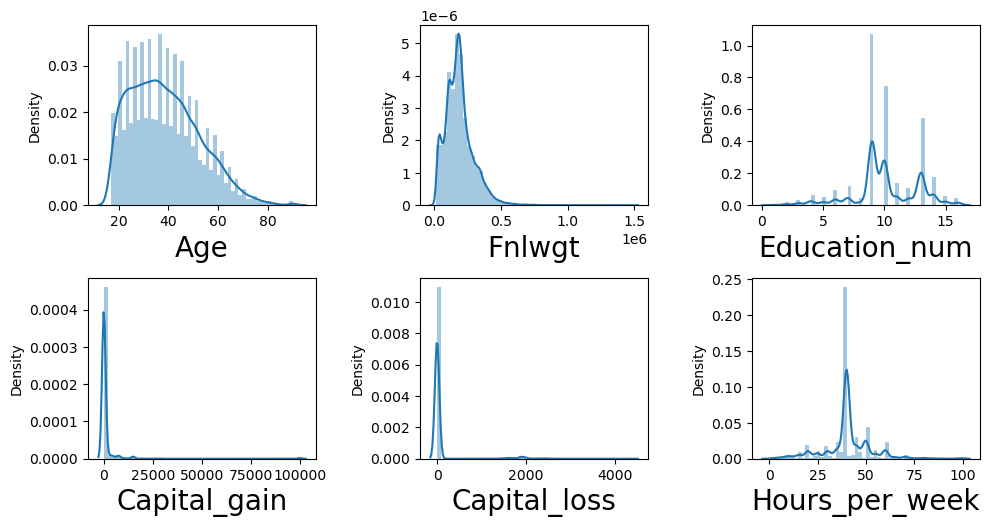

In [12]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(8,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are skewed (Not Normally Distrubuted)
- Age,Fnlwgt,Capital_gain,Capital_Loss are Right skewed
	

<AxesSubplot: xlabel='Education', ylabel='count'>

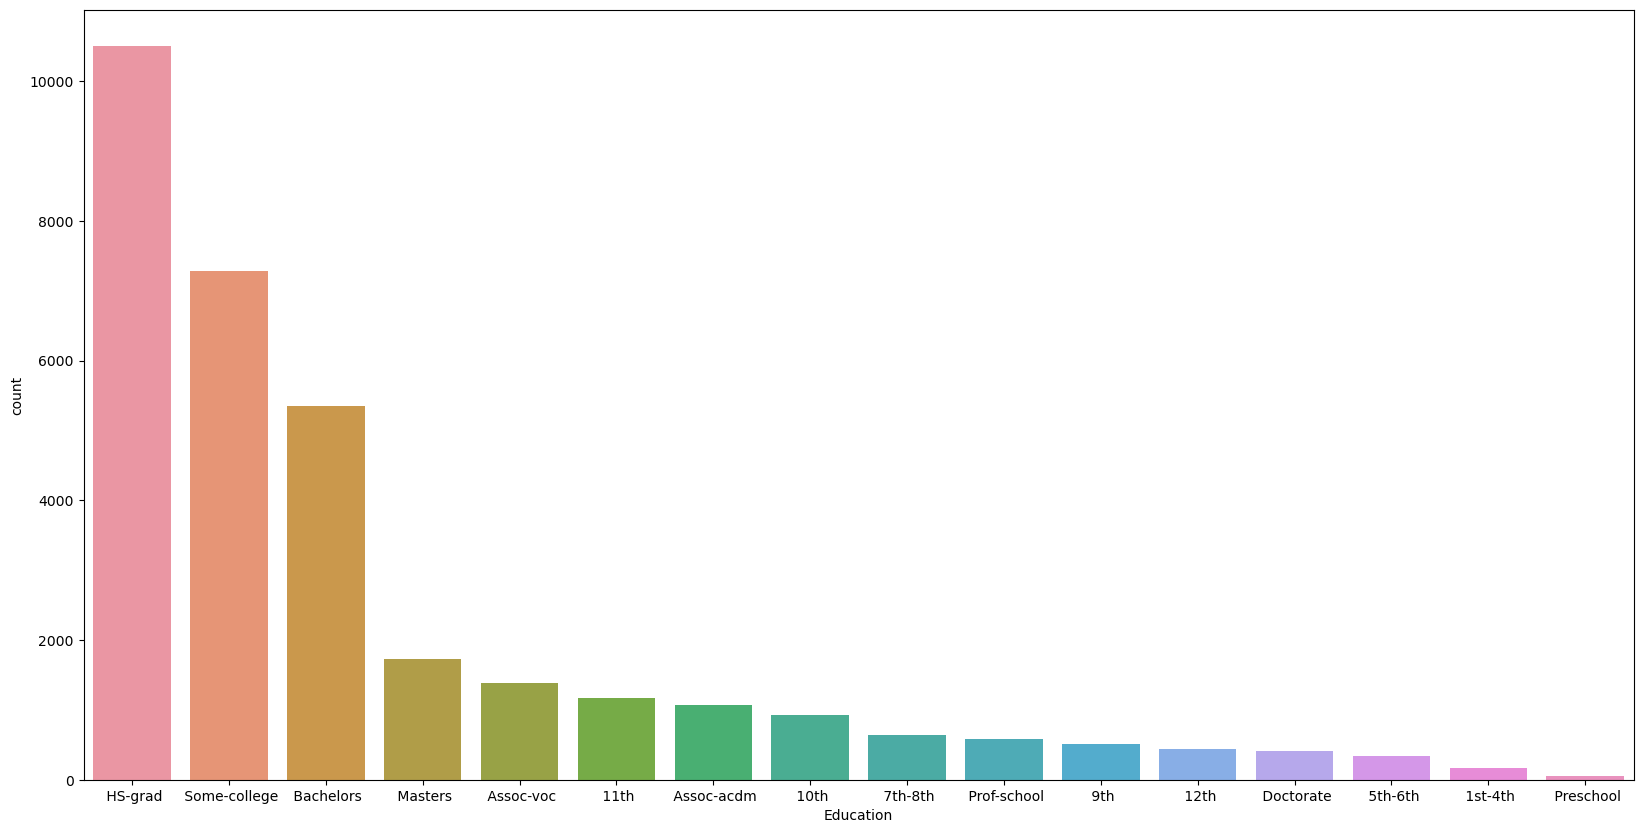

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Education', order=df.Education.value_counts().index)


- We can Observe that Majority of the population are Highschool Graduates and Least Number of people Passed Out From High SChool 

<AxesSubplot: xlabel='Race', ylabel='count'>

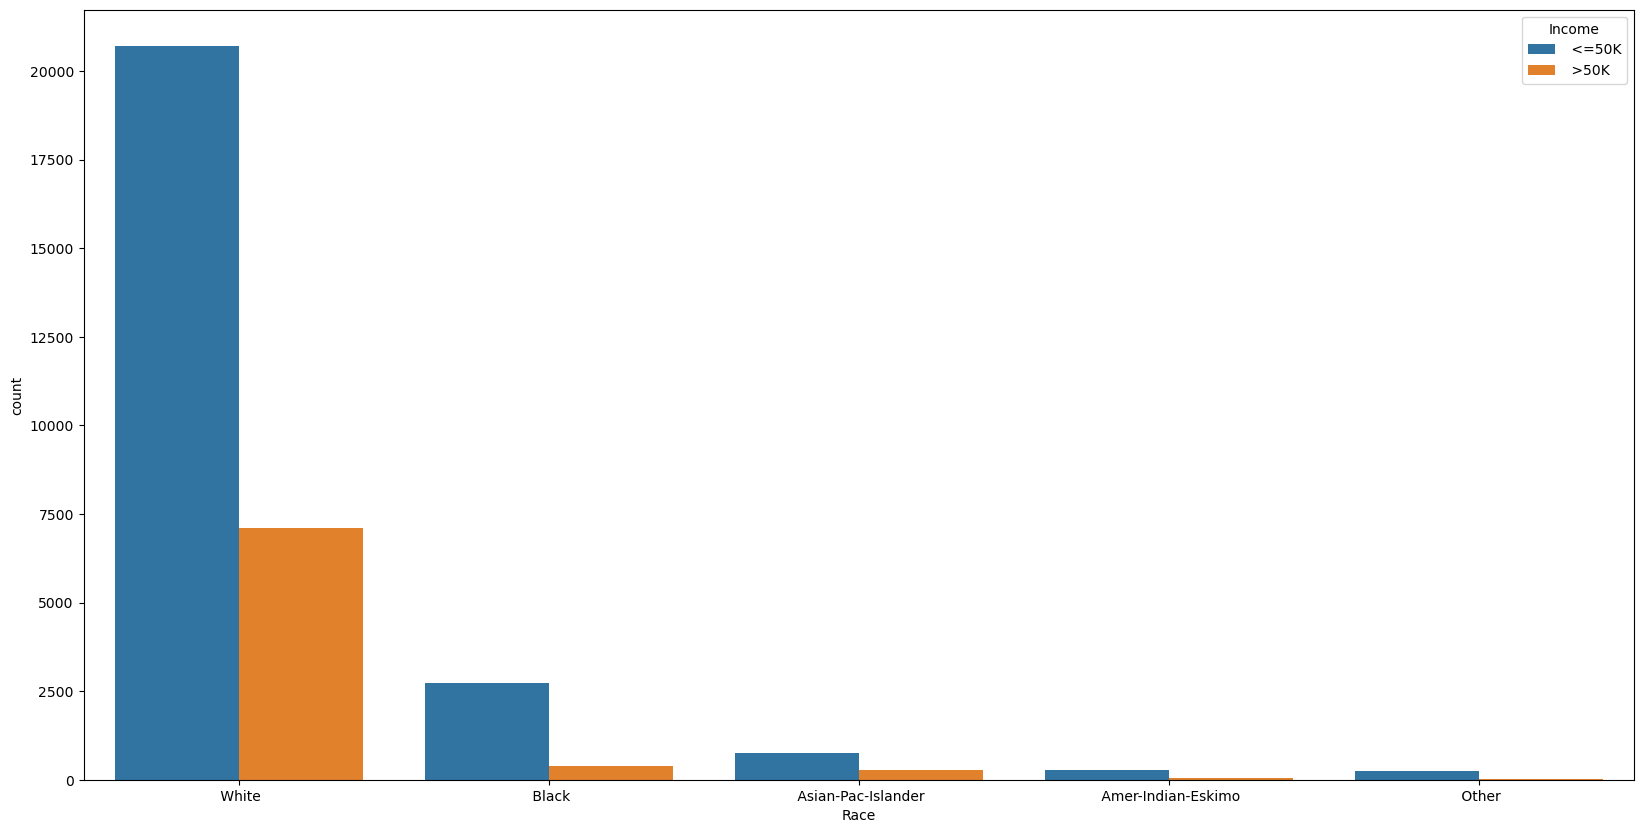

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Race',hue='Income')

Majority Of the Population Are White

<AxesSubplot: xlabel='Sex', ylabel='count'>

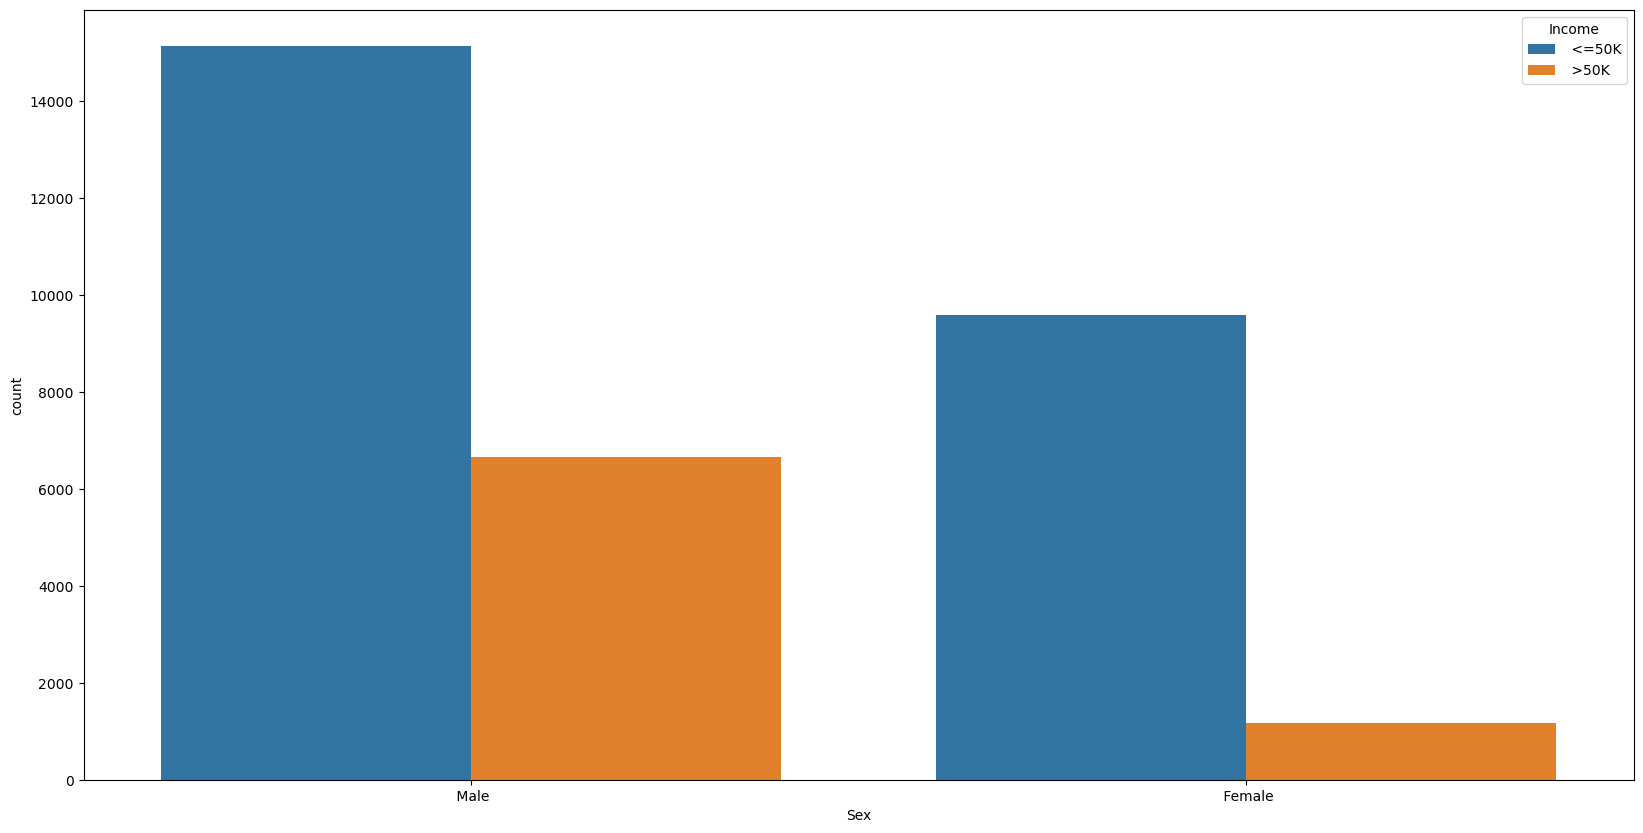

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Sex',hue='Income')

<AxesSubplot: xlabel='Occupation', ylabel='count'>

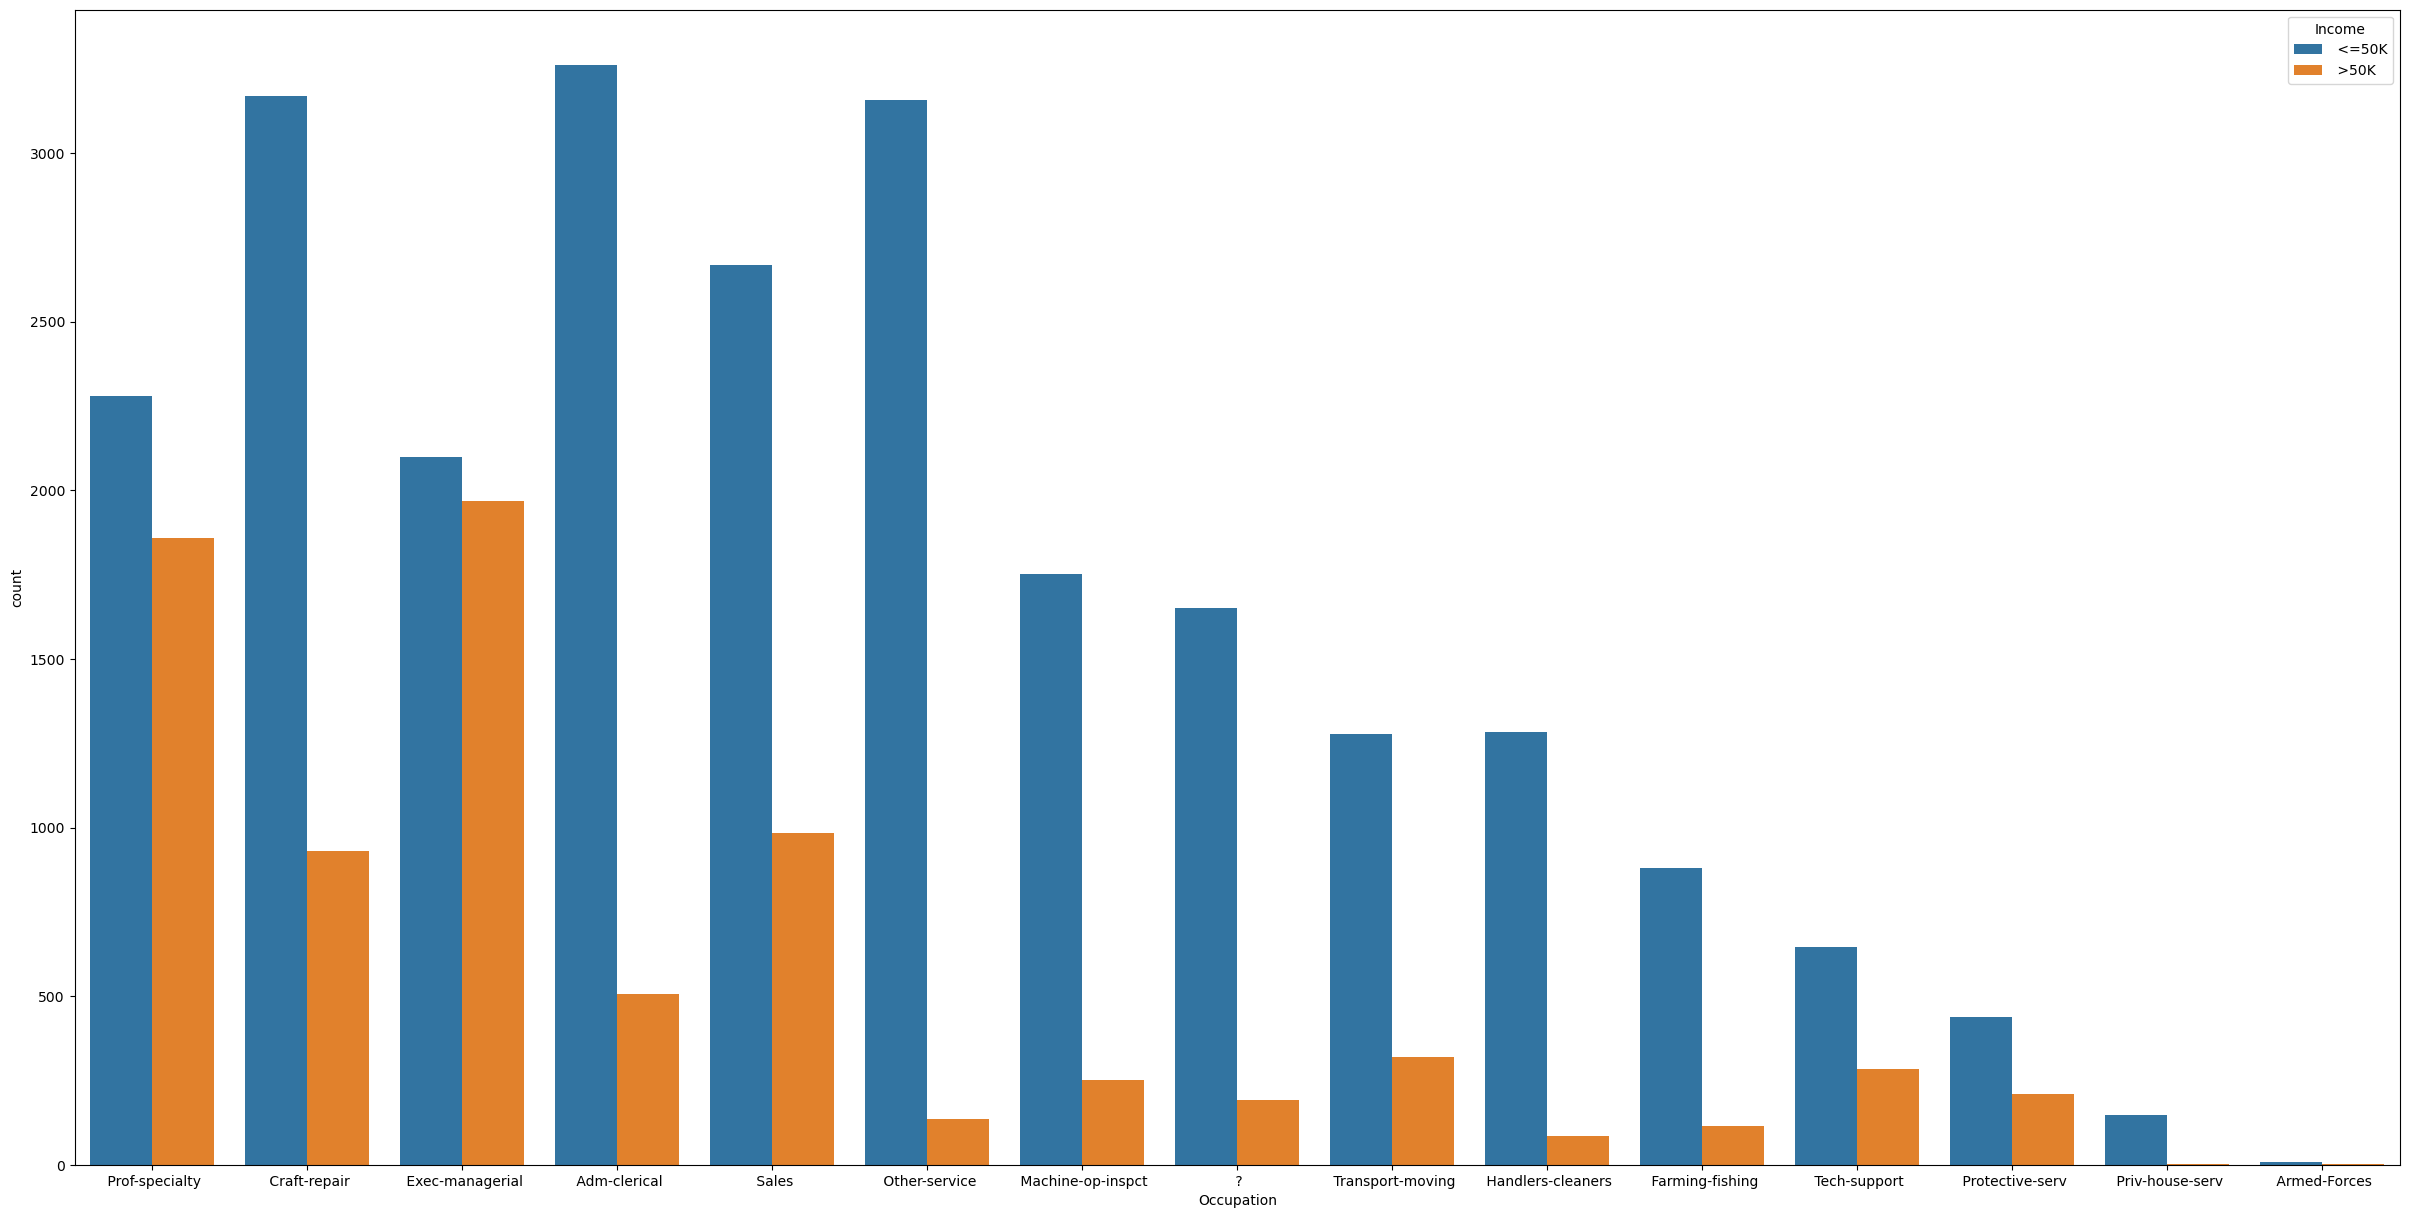

In [16]:
plt.figure(figsize=(30,15))
sns.countplot(data=df,x='Occupation',hue='Income',order=df.Occupation.value_counts().index)

- We can observe that Majority of People Earning >50K  are workinh in Prof-speciality and Exec-managerial Jobs
- Least Number of people are working in Armed-Forces And Priv-House-serv Jobs

<AxesSubplot: xlabel='Native_country', ylabel='count'>

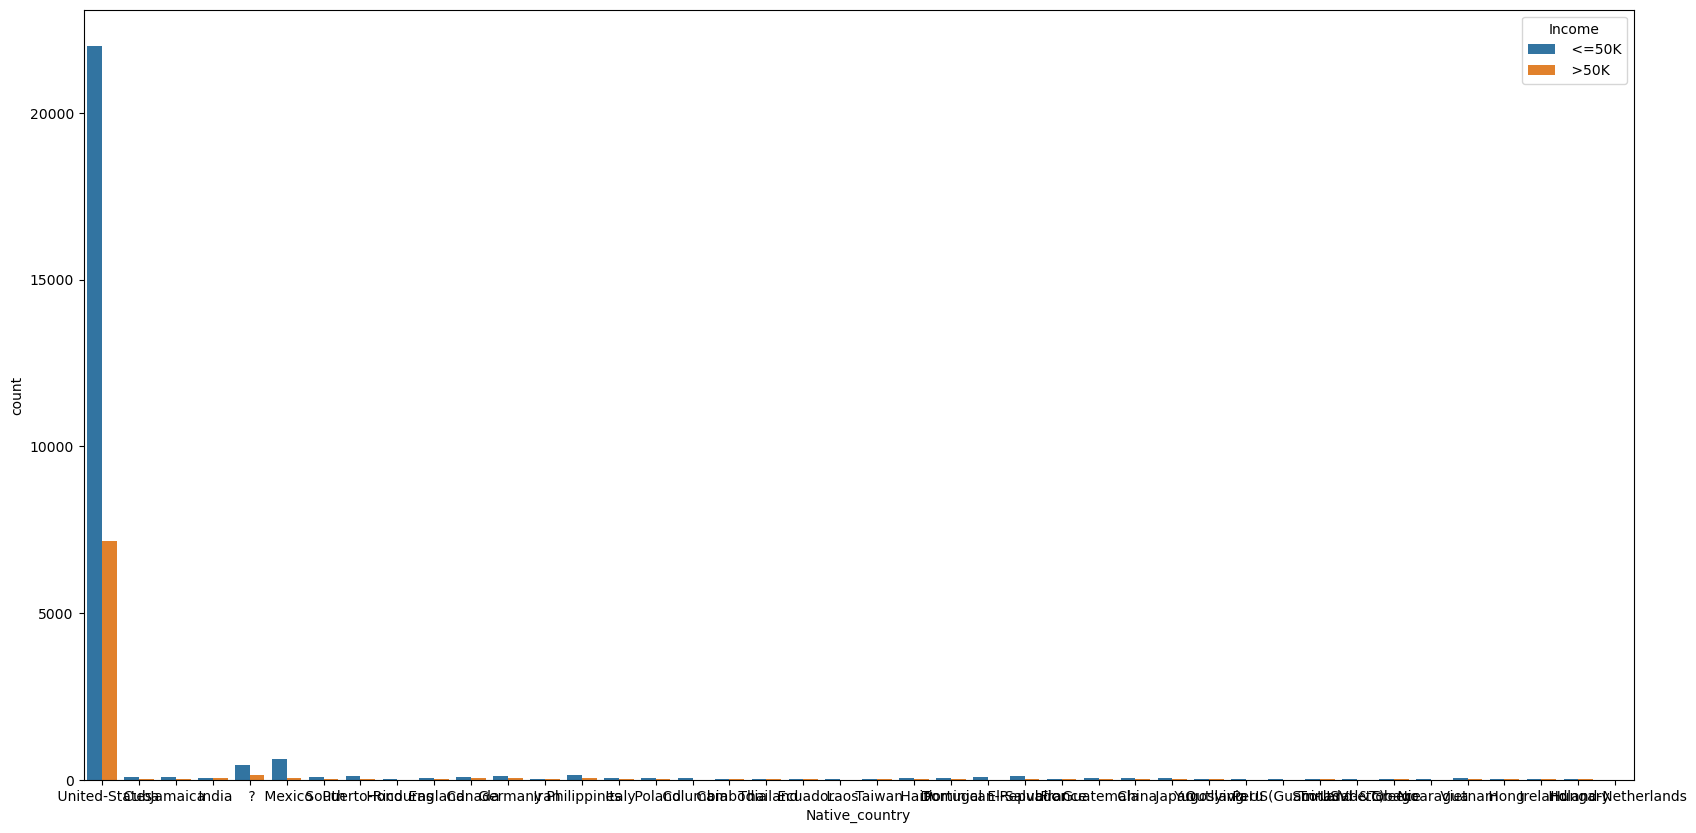

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Native_country',hue='Income')

<AxesSubplot: xlabel='Age', ylabel='Income'>

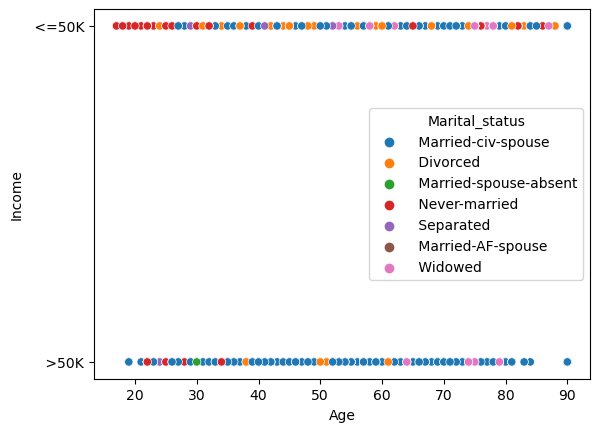

In [18]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Marital_status')

- It Seems That There is No Relation Between Age and Income
- Most of the people having Income Above 50k Belong to Never-Married Category
- Most of Never Married People Belong to Less Then 50k income Category

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

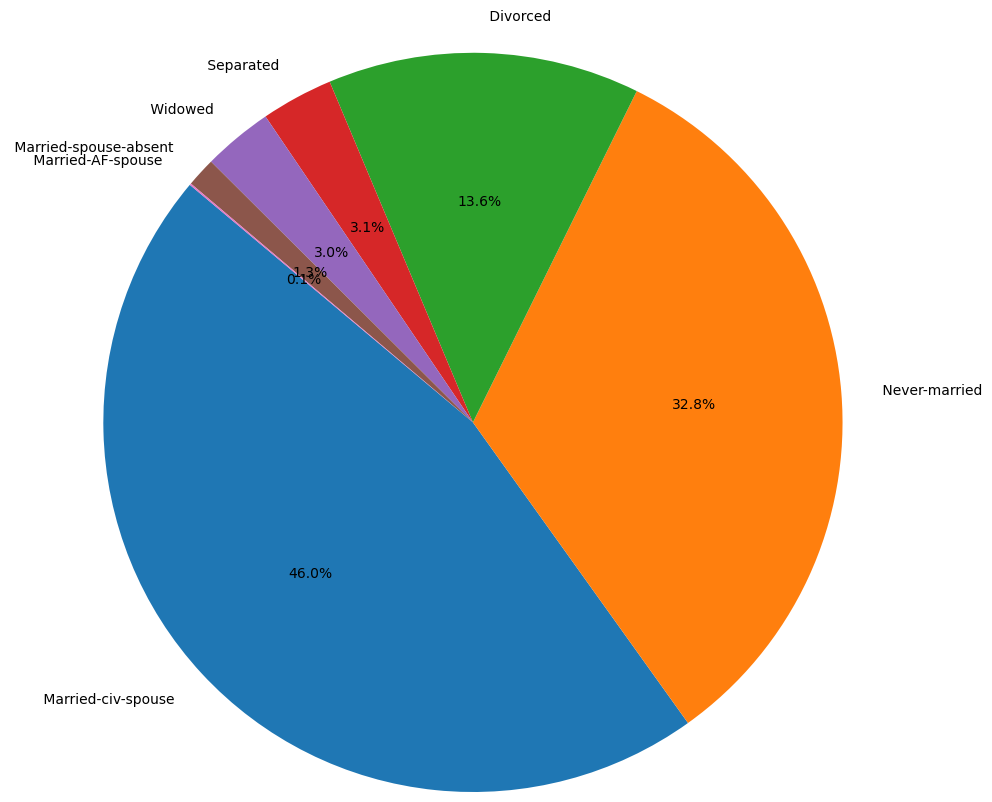

In [19]:
plt.pie(x=df.Marital_status.value_counts().values,labels=df.Marital_status.value_counts().index,autopct='%1.1f%%', startangle=140,radius=2.5)
df.Marital_status.value_counts().index

### PreProcessing

In [20]:
df.drop(columns='Education',inplace = True)

In [21]:
# Dropping duplicates If any
df.drop_duplicates(inplace=True)

In [22]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns:
    if df[i].nunique() <= 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

In [23]:
df[obj_col].nunique()

Workclass          9
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
lben= LabelEncoder()
for i in ['Income','Sex']:
    df[i]= lben.fit_transform(df[i])
    label_mapping = dict(zip(lben.classes_, lben.transform(lben.classes_)))
    print("Label mapping:", label_mapping)

Label mapping: {' <=50K': 0, ' >50K': 1}
Label mapping: {' Female': 0, ' Male': 1}


In [25]:
from category_encoders import BinaryEncoder
ben = BinaryEncoder()
encoaded = ben.fit_transform(df)

In [26]:
df = encoaded

### Outliers

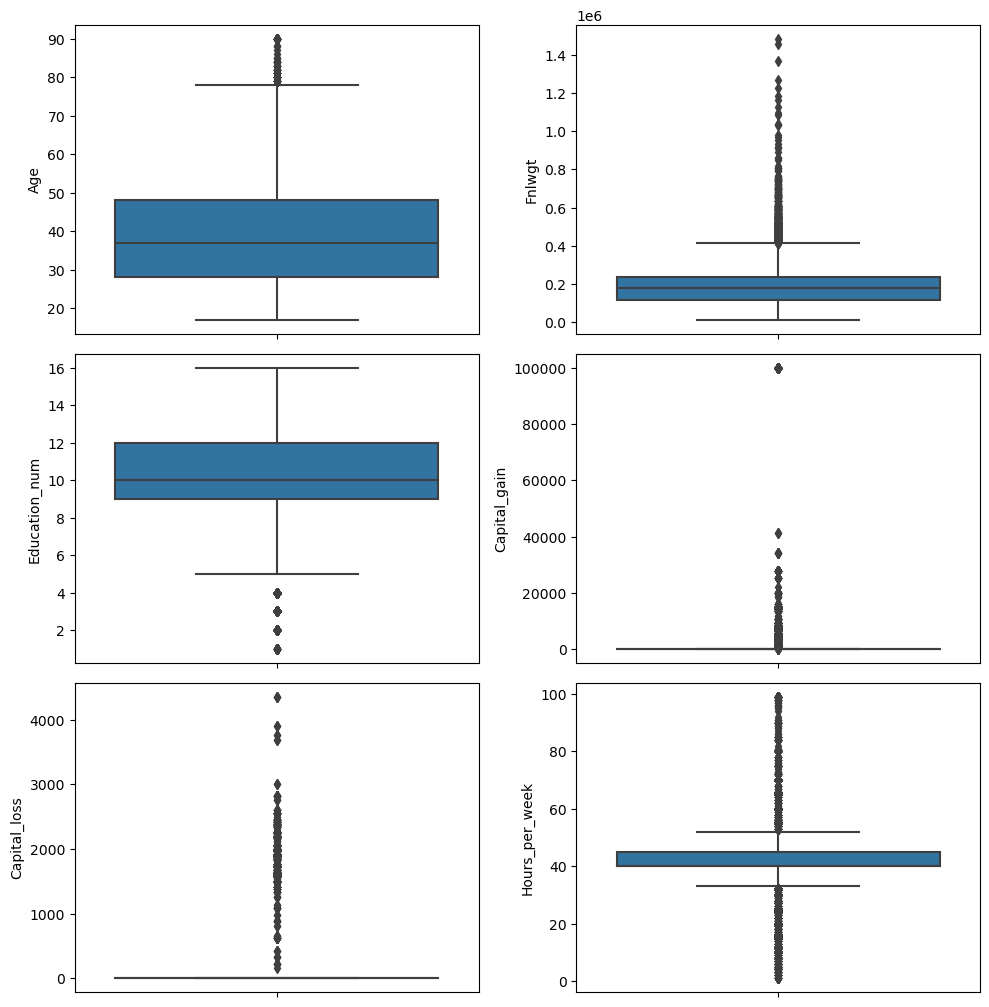

In [27]:
plt.figure(figsize=(10,20))
pn=1
for i in num_col:
    sns.boxplot(data=df,y=i,ax=plt.subplot(6,2,pn))
    pn+=1
plt.tight_layout()    

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [28]:
prev = df.shape

In [29]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col[:2]+ num_col[3:]]))
z[z>3].count()

Age                120
Fnlwgt             346
Capital_gain       215
Capital_loss      1470
Hours_per_week     440
dtype: int64

<AxesSubplot: >

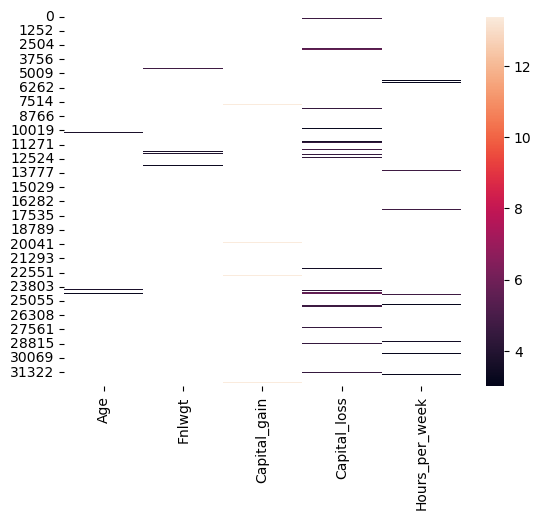

In [30]:
sns.heatmap(z[z>3])

In [31]:
df[num_col[:2]+ num_col[3:]] = df[num_col[:2]+ num_col[3:]][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,Age,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Fnlwgt,Education_num,Marital_status_0,Marital_status_1,Marital_status_2,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Relationship_0,Relationship_1,Relationship_2,Race_0,Race_1,Race_2,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income
0,50.0,0,0,0,1,83311.0,13,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0.0,0.0,13.0,0,0,0,0,0,1,0
1,38.0,0,0,1,0,215646.0,9,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.0,40.0,0,0,0,0,0,1,0
2,53.0,0,0,1,0,234721.0,7,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.0,0.0,40.0,0,0,0,0,0,1,0
3,28.0,0,0,1,0,338409.0,13,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0.0,0.0,40.0,0,0,0,0,1,0,0
4,37.0,0,0,1,0,284582.0,14,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0.0,0.0,40.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,27.0,0,0,1,0,257302.0,12,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0.0,0.0,38.0,0,0,0,0,0,1,0
30002,40.0,0,0,1,0,154374.0,9,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0.0,0.0,40.0,0,0,0,0,0,1,1
30003,58.0,0,0,1,0,151910.0,9,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0.0,0.0,40.0,0,0,0,0,0,1,0
30004,22.0,0,0,1,0,201490.0,9,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0.0,0.0,20.0,0,0,0,0,0,1,0


In [32]:
df.shape

(30006, 31)

In [33]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  7.78 %


Since our data loss is only 7.78% we can continue

#### Corelation Analysis

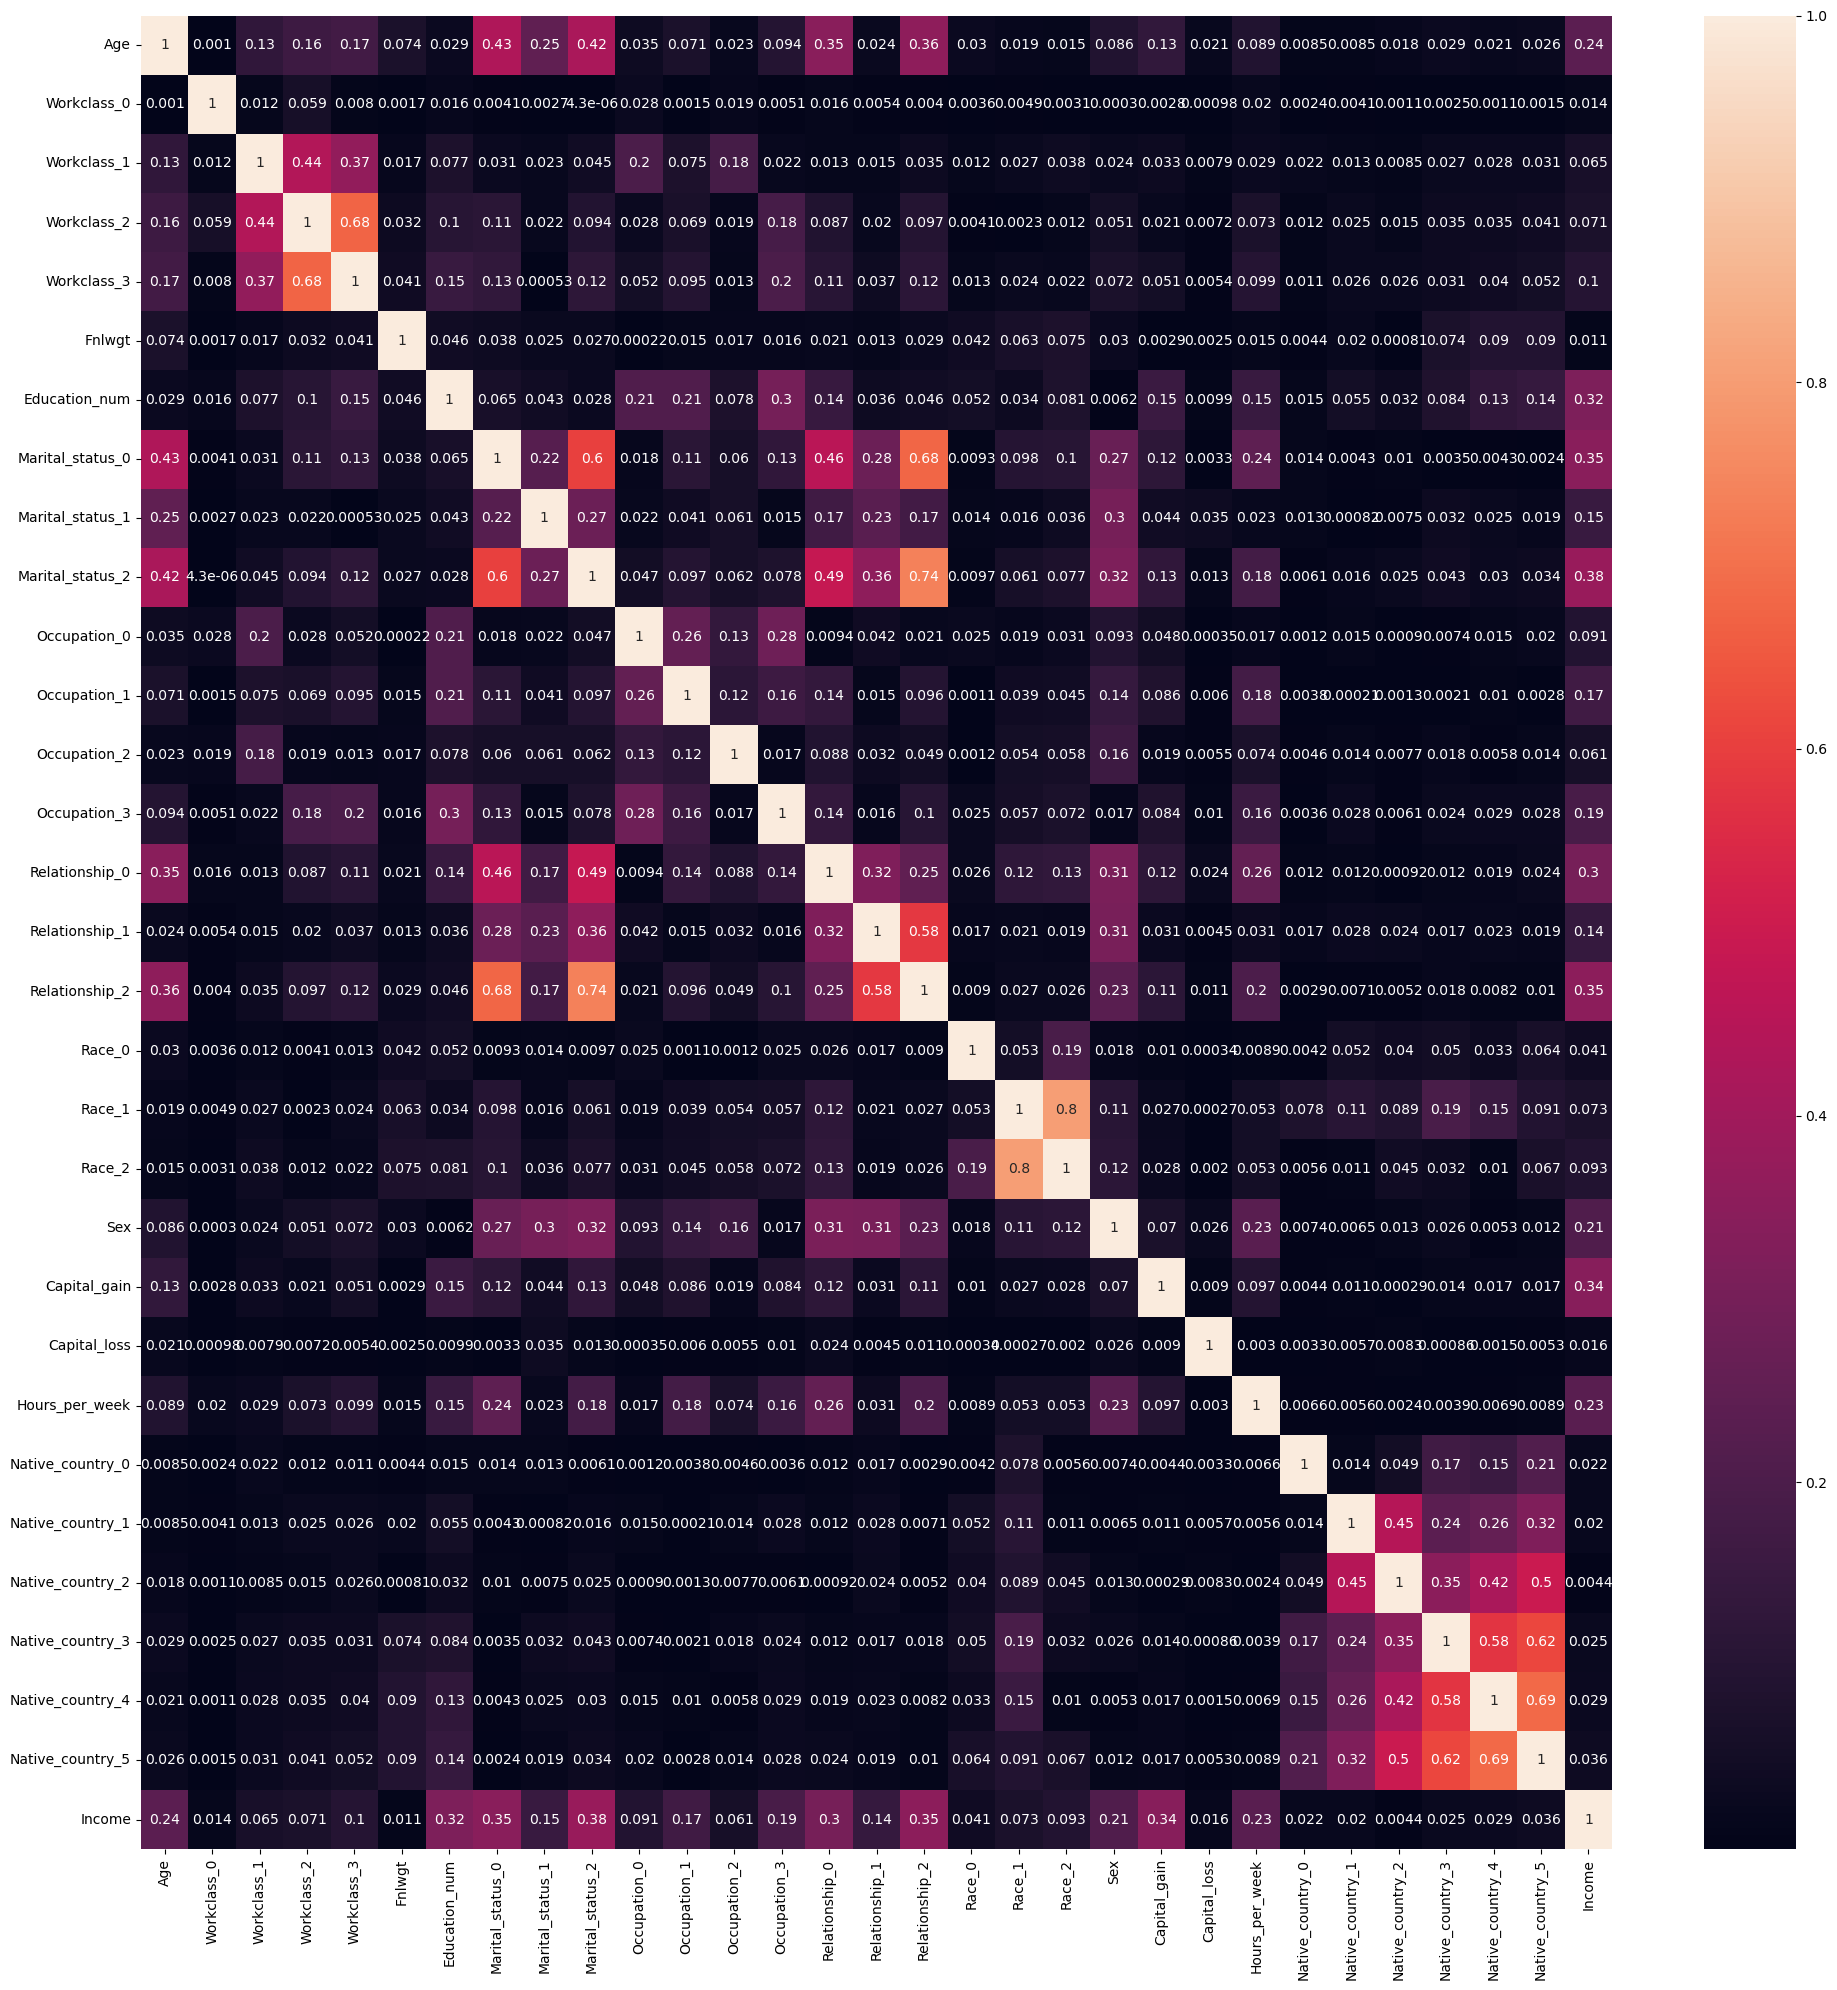

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

There are no Major Multicolinearity Observed

#### Treating Skewness

In [35]:
df[num_col[:2]+ num_col[3:]].skew()

Age                0.489089
Fnlwgt             0.634650
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
dtype: float64

skeweness of Capital_loss and Capital_Gain Needs to be removed

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[['Capital_gain','Capital_loss']] = pt.fit_transform(df[['Capital_gain','Capital_loss']])
df

,Age,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Fnlwgt,Education_num,Marital_status_0,Marital_status_1,Marital_status_2,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Relationship_0,Relationship_1,Relationship_2,Race_0,Race_1,Race_2,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income
0,50.0,0,0,0,1,83311.0,13,0,0,1,0,0,0,1,0,0,1,0,0,1,1,-0.000000,-0.0,13.0,0,0,0,0,0,1,0
1,38.0,0,0,1,0,215646.0,9,0,1,0,0,0,1,0,0,1,0,0,0,1,1,-0.000000,-0.0,40.0,0,0,0,0,0,1,0
2,53.0,0,0,1,0,234721.0,7,0,0,1,0,0,1,0,0,0,1,0,1,0,1,-0.000000,-0.0,40.0,0,0,0,0,0,1,0
3,28.0,0,0,1,0,338409.0,13,0,0,1,0,0,1,1,0,1,1,0,1,0,0,-0.000000,-0.0,40.0,0,0,0,0,1,0,0
4,37.0,0,0,1,0,284582.0,14,0,0,1,0,0,0,1,0,1,1,0,0,1,0,-0.000000,-0.0,40.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,27.0,0,0,1,0,257302.0,12,0,0,1,1,0,1,1,0,1,1,0,0,1,0,-0.000000,-0.0,38.0,0,0,0,0,0,1,0
30002,40.0,0,0,1,0,154374.0,9,0,0,1,1,0,1,0,0,0,1,0,0,1,1,-0.000000,-0.0,40.0,0,0,0,0,0,1,1
30003,58.0,0,0,1,0,151910.0,9,1,1,1,0,1,0,1,1,0,1,0,0,1,0,-0.000000,-0.0,40.0,0,0,0,0,0,1,0
30004,22.0,0,0,1,0,201490.0,9,1,0,0,0,1,0,1,1,0,0,0,0,1,1,-0.000000,-0.0,20.0,0,0,0,0,0,1,0


In [37]:
x = df.drop(columns='Income')
y=df['Income']

In [38]:
y.value_counts()

0    23349
1     6657
Name: Income, dtype: int64

### Resampling

we shall use mix of Smote  And Nearmiss

##### Under Sampling

In [39]:
# if grater no of samples
from imblearn.under_sampling import NearMiss

In [40]:
u_sm = NearMiss(sampling_strategy=0.50)
x,y=u_sm.fit_resample(x,y)

In [41]:
y.value_counts()

0    13314
1     6657
Name: Income, dtype: int64

##### Oversampling

In [42]:

from imblearn.over_sampling import SMOTE

In [43]:
ov_sm = SMOTE(sampling_strategy=0.80)
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

0    13314
1    10651
Name: Income, dtype: int64

#### Standerd scaler

In [44]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Age,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Fnlwgt,Education_num,Marital_status_0,Marital_status_1,Marital_status_2,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Relationship_0,Relationship_1,Relationship_2,Race_0,Race_1,Race_2,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,-0.193505,-0.022383,-0.443704,0.524086,-0.504365,0.459654,0.223562,-0.625017,-0.412997,0.790966,-0.504625,1.100824,1.038417,-1.222512,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.166761,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
1,0.051133,-0.022383,2.253753,0.524086,1.982693,-0.665423,1.037984,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,-0.963004,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.166761,-0.078292,-0.137865,-0.183904,4.141896,-0.205936,0.248328
2,0.621955,-0.022383,-0.443704,0.524086,-0.504365,-0.213481,0.223562,-0.625017,-0.412997,0.790966,-0.504625,1.100824,1.038417,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.166761,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
3,-0.764326,-0.022383,-0.443704,0.524086,-0.504365,0.067734,1.037984,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,1.038417,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.166761,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
4,0.214225,-0.022383,2.253753,0.524086,1.982693,-0.278956,0.630773,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,-0.963004,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,0.816137,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23960,0.686140,-0.022383,-0.443704,0.524086,-0.504365,0.809252,-0.998070,-0.625017,-0.412997,-1.264277,-0.504625,1.100824,-0.963004,0.817988,-0.515149,-0.610639,-1.325449,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.020368,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
23961,0.662808,-0.022383,-0.443704,0.524086,-0.504365,-0.232834,1.445194,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,1.038417,-1.222512,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,1.123983,-0.036133,1.799035,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
23962,1.415338,-0.022383,-0.443704,-1.908083,-0.504365,-0.028932,1.037984,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,-0.963004,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,-0.385730,-0.036133,-0.147753,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328
23963,1.610664,-0.022383,-0.443704,0.524086,-0.504365,-0.703778,-0.183648,-0.625017,-0.412997,0.790966,-0.504625,-0.908410,-0.963004,0.817988,-0.515149,-0.610639,0.754461,-0.116702,-0.325276,0.315298,0.658786,2.841710,-0.036133,0.026967,-0.078292,-0.137865,-0.183904,-0.241435,-0.205936,0.248328


# M.L

### Train test Split

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [46]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [47]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
608,939.0,83.113559,82.610147
142,219.0,83.030101,82.560080
71,121.0,83.007845,82.543391
500,770.0,82.991153,82.560080
228,351.0,82.985589,82.560080
...,...,...,...
92,151.0,82.529350,83.244326
196,306.0,82.523786,83.494660
95,154.0,82.523786,83.477971
646,992.0,82.512658,83.427904


- we can observe that Random state 939 we get max accuracy wit minimum difference

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=939)

### Training the model

In [49]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return accuracy_score(y_te,model.predict(x_te))


Logistic regression 

In [50]:
lr = LogisticRegression()
lr_ac_score = mod_train(lr,x_train,x_test,y_train,y_test)
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score*100,'\nAccuracy score',lr_ac_score*100,end = '\n\n')
    


cv =  4 
Cross Validation score =  81.84046555480752 
Accuracy score 82.61014686248332


cv =  5 
Cross Validation score =  81.97788441477154 
Accuracy score 82.61014686248332


cv =  6 
Cross Validation score =  82.19101702198688 
Accuracy score 82.61014686248332


cv =  7 
Cross Validation score =  82.35430374202315 
Accuracy score 82.61014686248332


cv =  8 
Cross Validation score =  82.26681763776298 
Accuracy score 82.61014686248332


cv =  9 
Cross Validation score =  82.42925401089157 
Accuracy score 82.61014686248332



- cv = 9 is giving best result

In [51]:
cv = 9

In [52]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [53]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',lr_s_cv_score*100,'\nAccuracy score = ',lr_ac_score*100,'\nDifference = ',lr_ac_score*100-(lr_s_cv_score*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score*100,2),'Test accuracy':round(lr_ac_score*100,2),'Difference':round(np.abs(lr_ac_score*100-(lr_s_cv_score*100)),2)},ignore_index=True)


Cross Validation score =  82.42925401089157 
Accuracy score =  82.61014686248332 
Difference =  0.18089285159175006


##### Random  forest classifer

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_ac_score = mod_train(rfc,x_train,x_test,y_train,y_test)

# cross validation
rfc_s_cv_score_mean=cross_val_score(rfc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score*100,'\nDifference = ',np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score*100,2),'Difference':round(np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.36957534616609 
Accuracy score =  85.04672897196261 
Difference =  0.6771536257965209


##### AdaBoostClassifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_ac_score = mod_train(abc,x_train,x_test,y_train,y_test)

# cross validation
abc_s_cv_score_mean=cross_val_score(abc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score*100,'\nDifference = ',np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'AdaBoost Classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score*100,2),'Difference':round(np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  83.66431999521505 
Accuracy score =  84.2456608811749 
Difference =  0.5813408859598468


##### GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_ac_score = mod_train(gbc,x_train,x_test,y_train,y_test)

# cross validation
gbc_s_cv_score_mean=cross_val_score(gbc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score*100,'\nDifference = ',np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Gradient Boosting Classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score*100,2),'Difference':round(np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.71169677740905 
Accuracy score =  84.64619492656877 
Difference =  0.0655018508402776


##### XGBClassifier

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_ac_score = mod_train(xgb,x_train,x_test,y_train,y_test)

# cross validation
xgb_s_cv_score_mean=cross_val_score(xgb,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score*100,'\nDifference = ',np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'XGBoost Classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score*100,2),'Difference':round(np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  85.32095392747797 
Accuracy score =  85.39719626168224 
Difference =  0.07624233420426663


##### SVC

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc_ac_score = mod_train(svc,x_train,x_test,y_train,y_test)

# cross validation
svc_s_cv_score_mean=cross_val_score(svc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score*100,'\nDifference = ',np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score*100,2),'Difference':round(np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  83.7770783437294 
Accuracy score =  84.37917222963952 
Difference =  0.6020938859101221


##### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_ac_score = mod_train(knn,x_train,x_test,y_train,y_test)

# cross validation
knn_s_cv_score_mean=cross_val_score(knn,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score*100,'\nDifference = ',np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score*100,2),'Difference':round(np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  81.87012840125747 
Accuracy score =  81.99265687583444 
Difference =  0.12252847457696703


In [60]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
4,XGBoost Classifier,85.32,85.40,0.08
1,Random forest classifier,84.37,85.05,0.68
3,Gradient Boosting Classifier,84.71,84.65,0.07
5,SVC,83.78,84.38,0.60
2,AdaBoost Classifier,83.66,84.25,0.58
0,Logistic regression,82.43,82.61,0.18
6,KNN Classifier,81.87,81.99,0.12


- we can observe that XGB Classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [61]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid  = {
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [63]:
# using grid search cv
gcv = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid,cv=7,scoring='accuracy')
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'min_child_weight': 2, 'subsample': 1.0}
Best score: 0.8624598196027807


# Training with best parms

In [64]:
final_model = XGBClassifier(colsample_bytree= 0.9, learning_rate= 0.2, min_child_weight= 2, subsample =1.0)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

85.88117489986648


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3316
           1       0.85      0.84      0.84      2676

    accuracy                           0.86      5992
   macro avg       0.86      0.86      0.86      5992
weighted avg       0.86      0.86      0.86      5992



#### roc curve

In [66]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [67]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.12394451 1.        ] 
tpr =  [0.         0.83744395 1.        ] 
threshold =  [2 1 0]


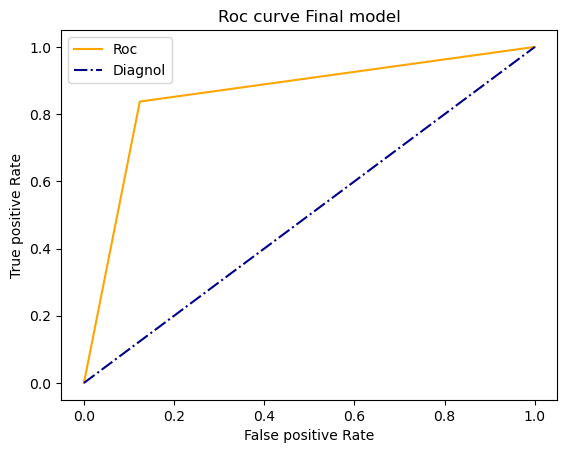

In [68]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [69]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

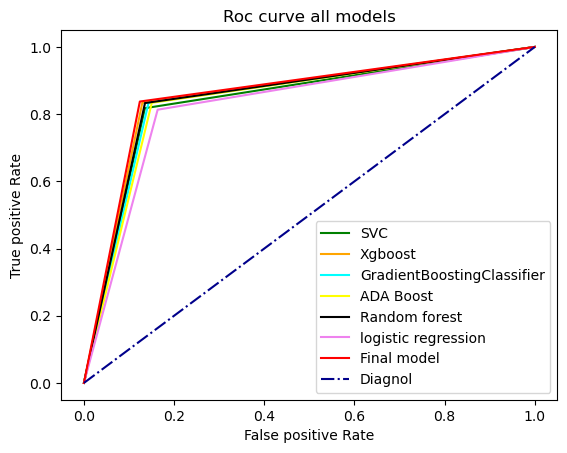

In [70]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc.predict(x_test))
fpr3,tpr3,threshold = roc_curve(y_test,xgb.predict(x_test))
fpr4,tpr4,threshold = roc_curve(y_test,gbc.predict(x_test))
fpr5,tpr5,threshold = roc_curve(y_test,abc.predict(x_test))
fpr6,tpr6,threshold = roc_curve(y_test,rfc.predict(x_test))
fpr7,tpr7,threshold = roc_curve(y_test,lr.predict(x_test))



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='violet',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [71]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

- Our Final Model Predicts Income with 86% Accuracy
- From Accuracy Scor and ROC_GRAPH we can say That Our Model Is Best Model